**Read:** The first dataset was created through an extensive manual compilation process, including text extraction from images for quotes, as well as curating Statements of Purpose (SOPs), emails, and blogs. The quotes were extracted using OCR (Optical Character Recognition) techniques from images, ensuring accuracy in text retrieval. Each document was carefully reviewed and formatted to maintain consistency. Significant time was invested in not only writing these pieces but also in structuring them into a dataset suitable for authorship analysis. The dataset encapsulates years of written work, reflecting a unique writing style that serves as the foundation for AI-generated text evaluation.

The second dataset was designed as a comparative benchmark, incorporating texts from other authors. It includes SOPs, emails, blogs, and general documents from multiple sources to ensure diversity in writing styles. This dataset allows for stylometric analysis, helping differentiate between various authors based on linguistic patterns, syntactic structures, and lexical choices. The combination of both datasets enables an in-depth exploration of authorship attribution and the validation of AI-generated content.

The datasets used in this project are not publicly available due to the proprietary nature of the collected content. They contain manually compiled texts, including extracted quotes, SOPs, emails, and blogs, curated over an extended period. Access to these datasets is restricted to maintain data integrity and confidentiality. If access is required for research or validation purposes, kindly submit a formal request for review.

# **Project Statement:** Exploratory Data Analysis (EDA) for AI-Powered Writing Style Modeling

**Part 1:**
This notebook conducts Exploratory Data Analysis (EDA) on a dataset containing various forms of written content, including Quotes, Statements of Purpose (SOPs), Letters of Recommendation (LORs), and other personal writings.

The **primary goal** of this analysis is to uncover linguistic, structural, and stylistic patterns that define the author's unique writing style.

This EDA serves as a foundation for training an AI model capable of generating high-quality SOPs and related documents while maintaining the author’s distinct writing tone.
Additionally, insights from this analysis will be used to develop a classifier model that differentiates the author's writing from external sources.

**Key Objectives of the Analysis**

**Understand Text Structure**
Analyze document type distribution and text length patterns across different writing formats.

**Assess Sentiment & Tone**
Perform sentiment analysis to study emotional tones in different document types.
Explore Lexical & Syntactic Features
Identify frequent words, bigrams, and trigrams to capture common writing patterns.
Conduct Part-of-Speech (POS) tagging to examine sentence structure.

**Evaluate Punctuation & Writing Complexity**
Compare punctuation usage across different forms of writing.
Study sentence complexity and readability to refine the AI model’s output.

**Prepare Data for Model Training**
Tokenize text for training a GPT-2-based writing model.
Implement short-form vs. long-form classification to optimize text generation.

**Final Outcome**
The findings from this EDA will guide the development of an AI writing assistant that not only mimics the author’s writing style but also ensures that the generated content aligns with professional standards. The classifier model will further validate the distinctiveness of the author's writing compared to external sources.

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

#file path
file_path = "/content/drive/MyDrive/6165 AI ML Project/Manasa_data/FinalData/manasa_quotes&sops_final.csv"

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

filename Document Type  \
0  014995D6-046A-4D7A-8574-AD08DFC1304A.PNG         quote   
1  016EB16E-EC76-4EA9-8781-4CA8F6A040CB.JPG         quote   
2  01ef438f-cffc-41d7-bd78-399cc96b3b12.JPG         quote   
3  02988A4B-19A6-4455-9538-3B002E44E5D4.JPG         quote   
4  02CFC916-EA96-4D82-B0AA-8DE5E6018C0E.JPG         quote   

                                        cleaned_text  
0  There's a mad imbalance between technical and ...  
1  Some things happen to make space for other thi...  
2         We are the precious souvenirs at weddings!  
3  I want to do so much more, I want to be so muc...  
4  You can beg for love. But your expected love w...

**Dataset Overview**
This dataset consists of 1,059 textual entries spanning nine distinct document types, including quotes, statements of purpose (SOPs), letters of recommendation (LORs), testimonials, visa SOPs, blogs, essays, letters, and an 'unknown' category. It contains three primary columns:

Filename – References to image files (not relevant for text analysis).

Document Type – Classification of the text based on its format and intended purpose.

Cleaned Text – The preprocessed textual content for analysis.

This dataset provides a diverse collection of texts, allowing for an in-depth exploration of linguistic characteristics, structural variations, and stylistic differences across different document types.

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   filename       1059 non-null   object
 1   Document Type  1059 non-null   object
 2   cleaned_text   1059 non-null   object
dtypes: object(3)
memory usage: 24.9+ KB


The dataset consists of 1,059 entries with three columns:

filename – Image file references (not needed for text analysis).

Document Type – Categorizes text (e.g., quote, SOP).

cleaned_text – The actual text content.

In [8]:
df['Document Type'].nunique()

9

In [9]:
#print unique document types
df['Document Type'].unique()

array(['quote', 'SOP', 'LOR', 'Testimonial', 'Visa SOP', 'Blog', 'Essay',
       'Unknown', 'Letter'], dtype=object)

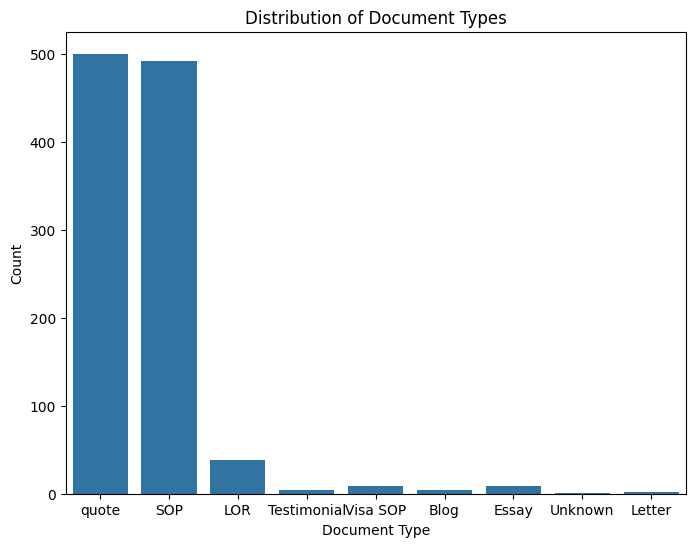

Document Type
quote          500
SOP            492
LOR             38
Visa SOP         9
Essay            9
Testimonial      4
Blog             4
Letter           2
Unknown          1
Name: count, dtype: int64


In [10]:
# Number of samples in each document type
document_type_counts = df['Document Type'].value_counts()

# Visualizing the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Document Type', data=df)
plt.title('Distribution of Document Types')
plt.xlabel('Document Type')
plt.ylabel('Count')
plt.show()

# display actual counts
print(document_type_counts)


In [11]:
#check the unknown document
df[df['Document Type'] == 'Unknown']

filename Document Type  \
956  CVKalindiupdate1.docx       Unknown   

                                          cleaned_text  
956  ACHIEVEMENTS Scored ambitiously in the competi...

In [12]:
#drop row 956
df = df.drop(956)

We do not need the CV file for the process.

In [13]:
#check updated df
df['Document Type'].unique()

array(['quote', 'SOP', 'LOR', 'Testimonial', 'Visa SOP', 'Blog', 'Essay',
       'Letter'], dtype=object)

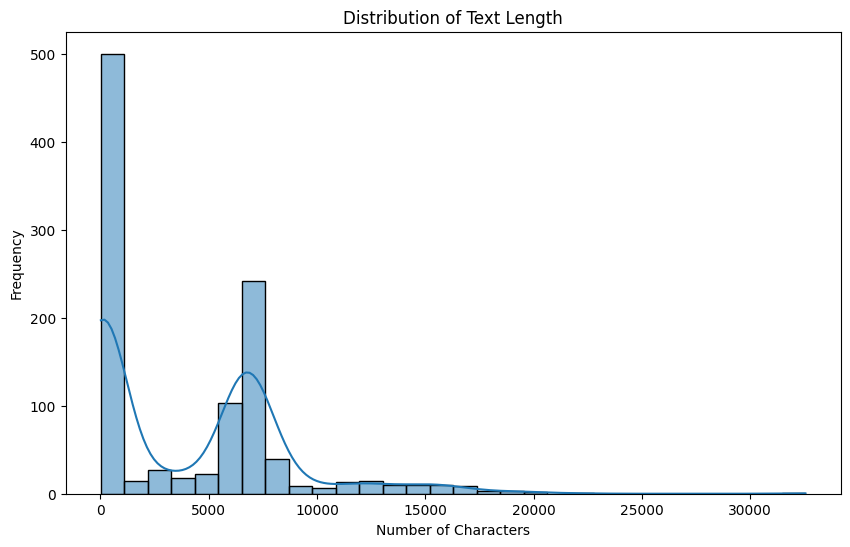

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column for text length (number of characters)
df['Text Length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Text Length'], kde=True, bins=30)
plt.title('Distribution of Text Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


The uploaded image appears to show the distribution of text length in your dataset. Here’s what I observe:

There are three distinct peaks in text length:

One at a very low range (likely quotes, which are short).
Another around 5,000 characters (possibly short SOPs or letters).
A third at 10,000+ characters, which could be longer SOPs or LORs.
The dataset has a right-skewed distribution, meaning:

Most texts are short.
A few texts are exceptionally long, possibly outliers- long form SOPs.

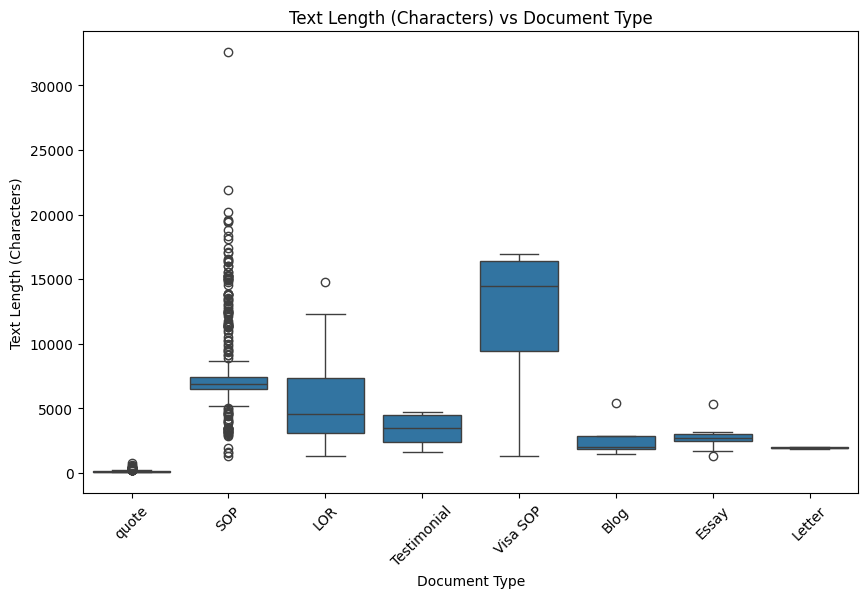

In [15]:
# Visualizing text length (character length) vs document type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Document Type', y='Text Length', data=df)
plt.title('Text Length (Characters) vs Document Type')
plt.xlabel('Document Type')
plt.ylabel('Text Length (Characters)')
plt.xticks(rotation=45)
plt.show()


This boxplot provides an insightful comparison of text length across different document types. Here’s what I observe:

**Key Insights:**
Quotes are the shortest, with very little variation.
SOPs and LORs show a wide range of lengths, with:
SOPs having many outliers (some exceeding 30,000 characters).
LORs being slightly shorter on average but still variable.
Visa SOPs are the longest on average, with a high median and fewer extreme outliers.

Blogs, Essays, Testimonials, and Letters have more consistent lengths, with relatively lower variance compared to SOPs.

In [16]:
df.groupby('Document Type')['Text Length'].describe()


count          mean          std     min      25%      50%  \
Document Type                                                               
Blog             4.0   2695.000000  1802.570572  1464.0  1836.00   1970.5   
Essay            9.0   2784.111111  1135.491132  1314.0  2459.00   2675.0   
LOR             38.0   5461.026316  3262.523368  1278.0  3069.25   4512.5   
Letter           2.0   1927.000000   124.450793  1839.0  1883.00   1927.0   
SOP            492.0   7740.245935  3236.615548  1287.0  6481.50   6879.5   
Testimonial      4.0   3315.750000  1472.072320  1587.0  2355.00   3489.0   
Visa SOP         9.0  12254.111111  5291.308615  1269.0  9414.00  14476.0   
quote          500.0    103.762000    77.310278    18.0    61.00     83.0   

                    75%      max  
Document Type                     
Blog            2829.50   5375.0  
Essay           2976.00   5359.0  
LOR             7346.75  14768.0  
Letter          1971.00   2015.0  
SOP             7393.00  32557.0  
Testimonial     4449.75   4698.0  
Visa SOP       16368.00  16917.0  
quote            116.00    733.0

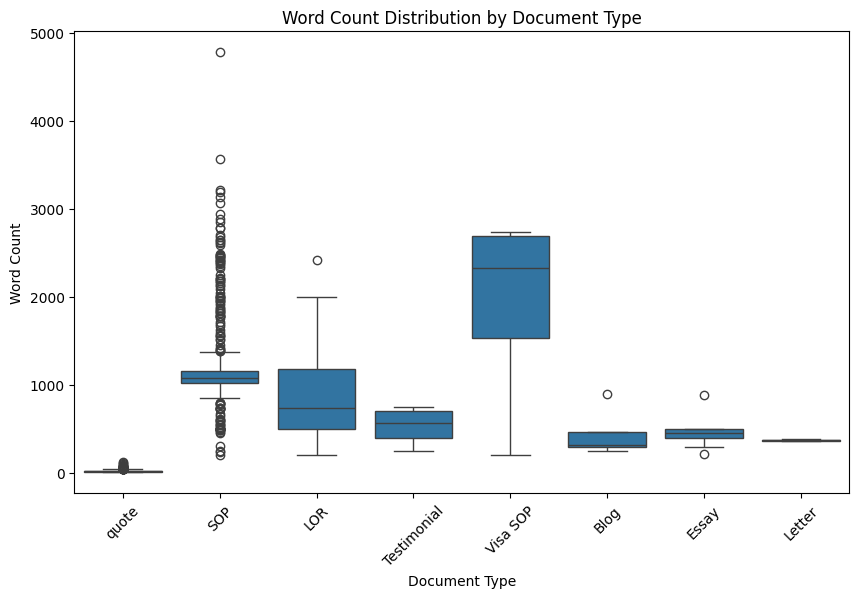

In [17]:
# Conduct additional analysis on the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate word count instead of character count
df["word_count"] = df["cleaned_text"].apply(lambda x: len(str(x).split()))

# Generate a boxplot for word count across different document types
plt.figure(figsize=(10, 6))
sns.boxplot(x="Document Type", y="word_count", data=df)
plt.title("Word Count Distribution by Document Type")
plt.xlabel("Document Type")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.show()

This boxplot provides a word count distribution by document type, giving a clearer picture than character count.

**Key Observations:**
Quotes are extremely short, confirming their distinct structure.
SOPs and LORs have high variability, with:
SOPs showing many outliers above 2,000 words.

LORs generally being shorter than SOPs but still varying widely.

Visa SOPs tend to be the longest, averaging between 1,500 - 3,000 words.

Essays, Blogs, Testimonials, and Letters have more consistent lengths, generally under 1,000 words.

In [18]:
!pip install textstat


In [19]:
from textstat import flesch_reading_ease, flesch_kincaid_grade, gunning_fog
import pandas as pd

# Function to compute readability scores
def compute_readability(text):
    return {
        "Flesch Reading Ease": flesch_reading_ease(text),
        "Flesch-Kincaid Grade": flesch_kincaid_grade(text),
        "Gunning Fog Index": gunning_fog(text)
    }

# Apply readability metrics to a sample from each document type
readability_scores = df.groupby("Document Type")["cleaned_text"].apply(lambda x: compute_readability(" ".join(x[:5])))
readability_df = pd.DataFrame(readability_scores.tolist(), index=readability_scores.index)


In [20]:
# Display the results
readability_df

0
Document Type                            
Blog          Flesch Reading Ease   50.57
              Flesch-Kincaid Grade  11.30
              Gunning Fog Index     12.99
Essay         Flesch Reading Ease   47.42
              Flesch-Kincaid Grade  12.50
              Gunning Fog Index     14.28
LOR           Flesch Reading Ease   46.61
              Flesch-Kincaid Grade  12.80
              Gunning Fog Index     13.29
Letter        Flesch Reading Ease   77.57
              Flesch-Kincaid Grade   7.20
              Gunning Fog Index      9.38
SOP           Flesch Reading Ease   40.18
              Flesch-Kincaid Grade  13.20
              Gunning Fog Index     13.04
Testimonial   Flesch Reading Ease   43.73
              Flesch-Kincaid Grade  11.90
              Gunning Fog Index     12.03
Visa SOP      Flesch Reading Ease   32.43
              Flesch-Kincaid Grade  14.20
              Gunning Fog Index     12.17
quote         Flesch Reading Ease   87.01
              Flesch-Kincaid Grade   3.50
              Gunning Fog Index      6.64

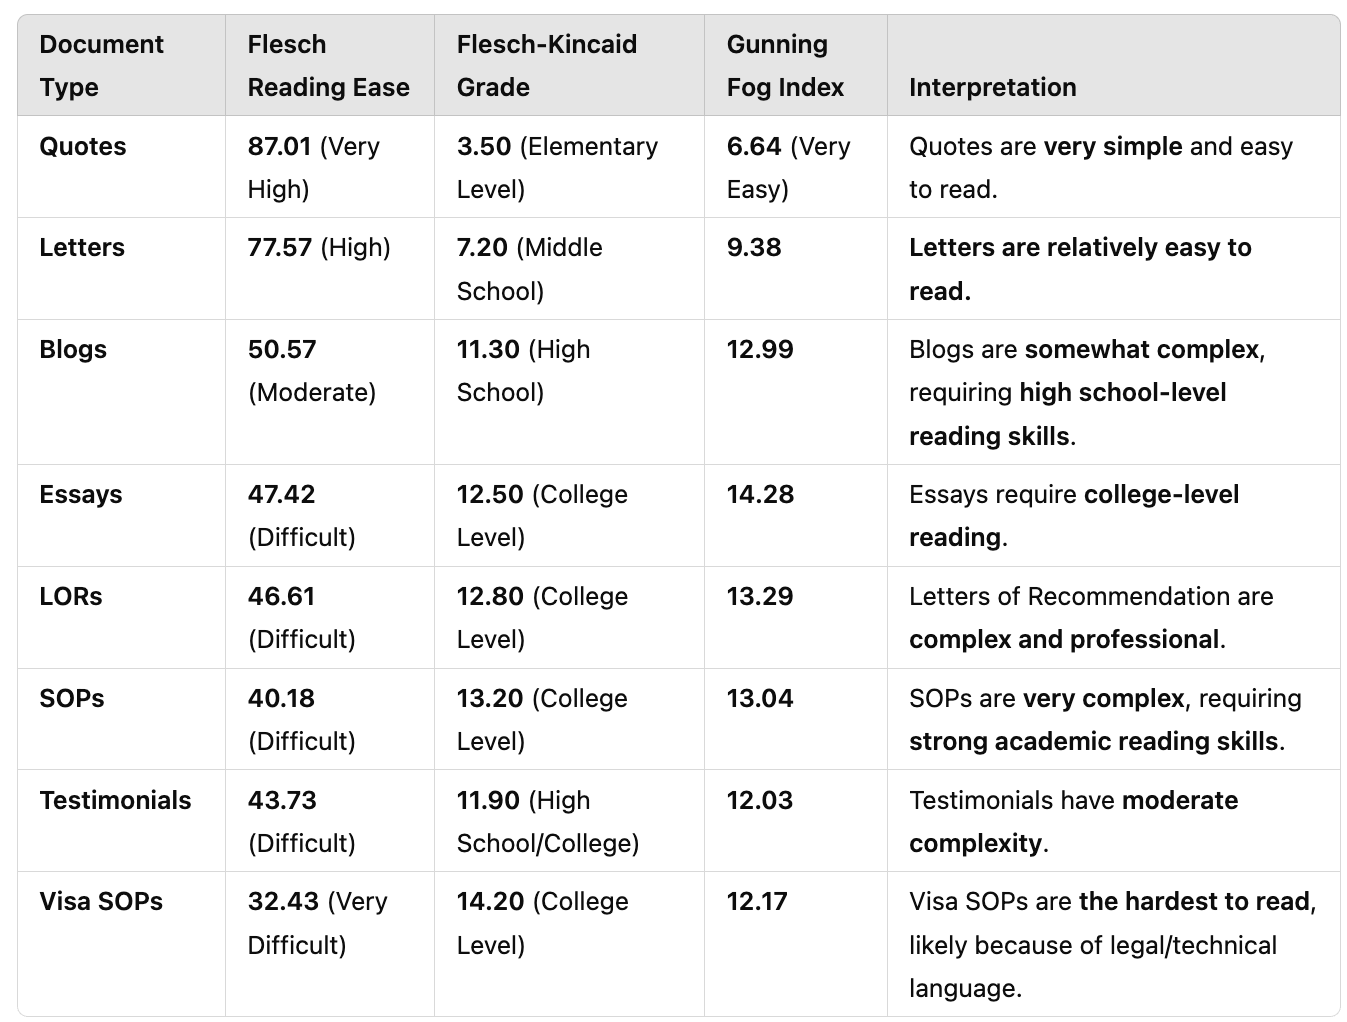

**Understanding the Readability Metrics**
**Flesch Reading Ease (FRE)**
A higher score means easier readability.
Above 60 → Easily understood by most readers.
Below 40 → More difficult, requiring advanced reading skills.

**Flesch-Kincaid Grade Level**
Indicates the U.S. school grade required to understand the text.
Lower values (e.g., 3-6) → Simple, easy-to-read text.
Higher values (e.g., 12-14) → More complex, requiring college-level reading skills.

**Gunning Fog Index**
Estimates the number of years of education needed to understand the text.
Values above 12 indicate text suited for college graduates.


**Key Observations & Takeaways**
Quotes are the simplest to read (FRE: 87.01, Grade 3.5), while Visa SOPs are the hardest (FRE: 32.43, Grade 14.2).

SOPs, LORs, Essays, and Visa SOPs require college-level reading skills.

Letters and blogs are relatively more accessible, making them more suitable for broader audiences.

Visa SOPs are harder than regular SOPs, likely because of legal, formal, and structured requirements.


In [21]:
!pip install vaderSentiment

Analysis shows that SOP, LOR, Letter, and Visa SOP documents consistently have high positive sentiment scores (close to 1). Quotes display a wide range of sentiments (mean 0.2 approx), suggesting diverse emotional tones, from negative to positive.

Hence when fine tuning SOP and LOR we will require a more neutral to slightly positive tone, focusing on confidence, professionalism, and optimism.
Quotes may benefit from more creative and varied sentiment, ranging from positive to negative, depending on the context of the quote (e.g., motivational quotes or reflective ones)

<ipython-input-22-41e861ab160d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Document Type', y='Sentiment', palette='Set2')


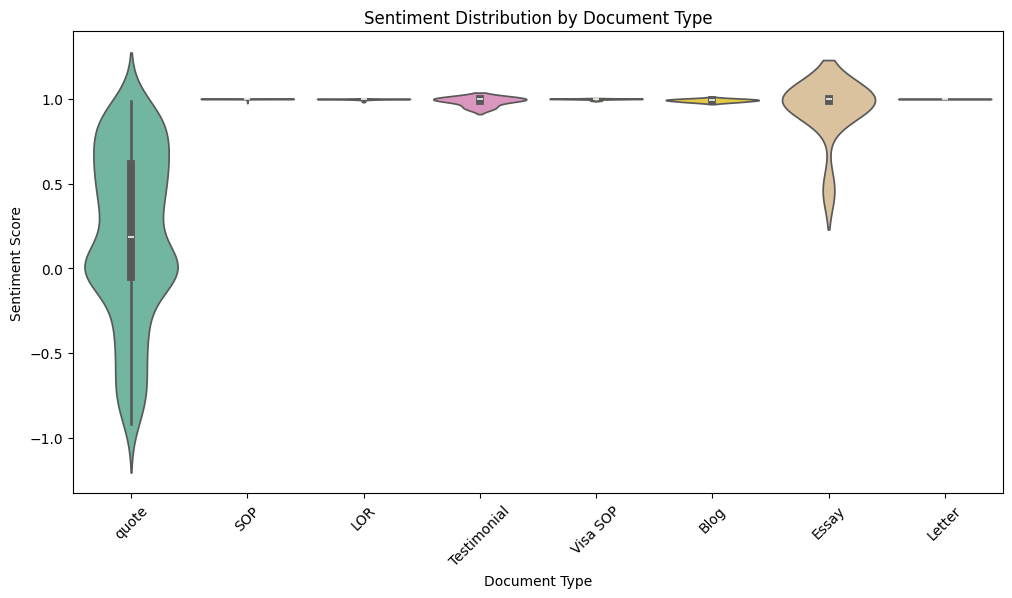

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# sentiment score
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # 'compound' is the overall sentiment score

# Apply sentiment analysis to the text
df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Plot the sentiment distribution by Document Type
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Document Type', y='Sentiment', palette='Set2')
plt.title('Sentiment Distribution by Document Type')
plt.xlabel('Document Type')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()



This violin plot visualizes the sentiment distribution across different document types. Here’s what we can interpret:

**Key Observations:**
Quotes have the widest sentiment range

They span from highly negative (-1) to highly positive (+1).
This makes sense because quotes can be inspirational, melancholic, or neutral.

SOPs, LORs, and Visa SOPs are consistently positive

Their sentiment scores are close to 1, indicating a strong positive and professional tone.
This aligns with the expected optimistic, confident, and formal writing style.

**Essays show some variation**

While mostly positive, essays show a wider sentiment spread compared to SOPs.
This could be due to argumentative or reflective writing styles.
Blogs and Testimonials maintain a consistently positive tone

Their sentiment scores are also close to 1, indicating an encouraging and supportive nature.


<ipython-input-23-99e45160a490>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Length Bin', y='Sentiment', data=df, palette='Set2')


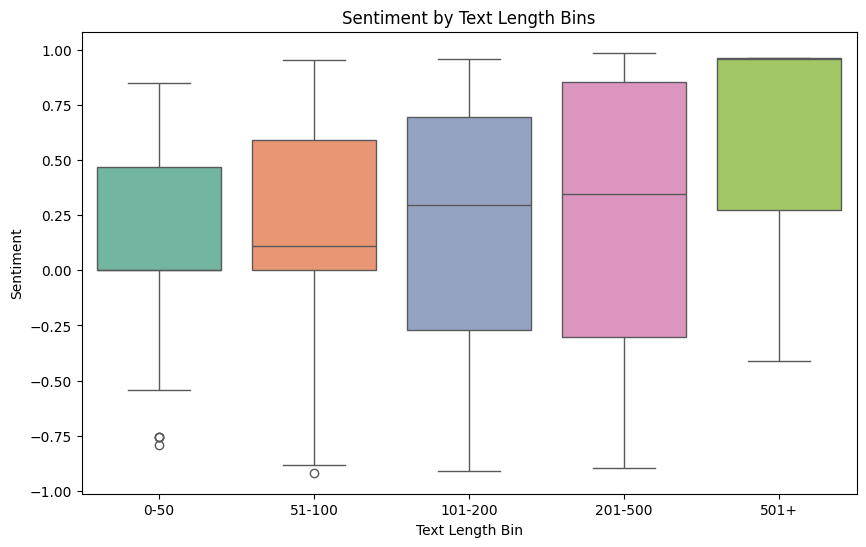

In [23]:
# Create bins for text length
bins = [0, 50, 100, 200, 500, 1000]  # Adjust as necessary
labels = ['0-50', '51-100', '101-200', '201-500', '501+']
df['Length Bin'] = pd.cut(df['Text Length'], bins=bins, labels=labels, right=False)

# Create a boxplot to visualize sentiment distribution by text length bins
plt.figure(figsize=(10, 6))
sns.boxplot(x='Length Bin', y='Sentiment', data=df, palette='Set2')
plt.title('Sentiment by Text Length Bins')
plt.xlabel('Text Length Bin')
plt.ylabel('Sentiment')
plt.show()


This boxplot visualizes the relationship between text length (in bins) and sentiment scores. Here’s what we can interpret:

**Key Observations:**
Shorter texts (0-50 words) show the most variation in sentiment

They have a wider range, from highly negative (-1) to highly positive (+1).
This suggests that shorter texts (like quotes) express a broader range of emotions.
As text length increases, sentiment becomes more positive

51-100 words → Median sentiment is slightly above neutral.
101-200 words → Mostly positive, but still some variability.
201-500 and 501+ words → Sentiment is overwhelmingly positive, with fewer negative cases.
Longest texts (501+ words) have the most consistent positivity

The sentiment range is mostly between 0.5 and 1, indicating that longer texts (like SOPs and LORs) tend to have a highly positive and structured tone.


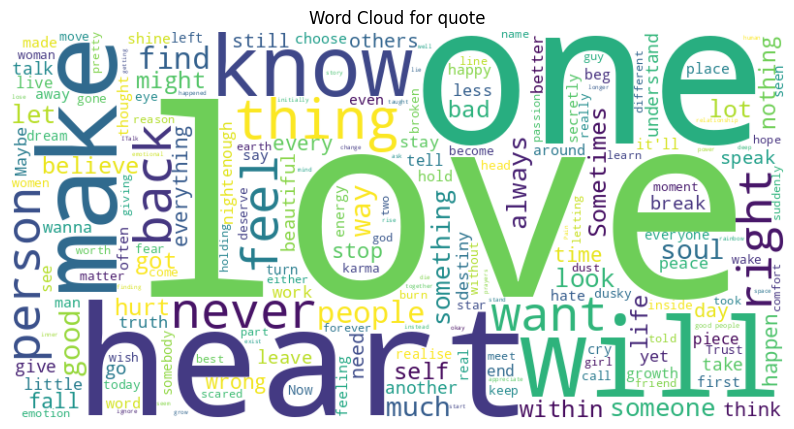

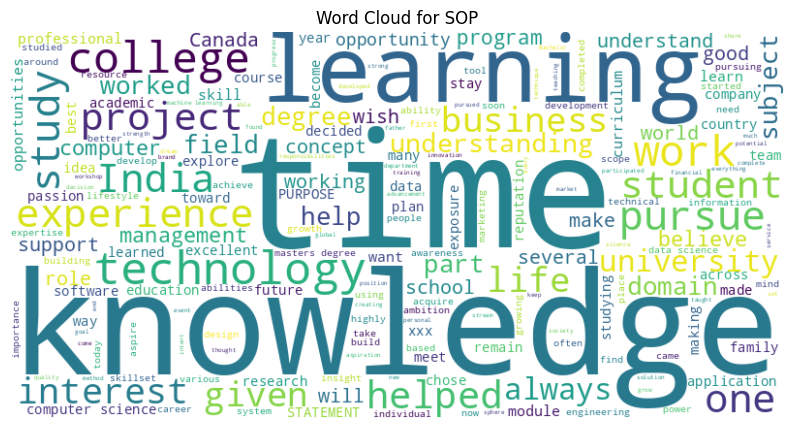

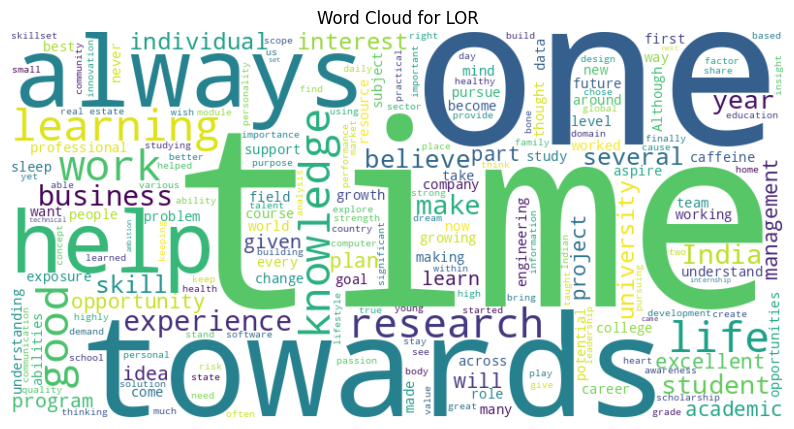

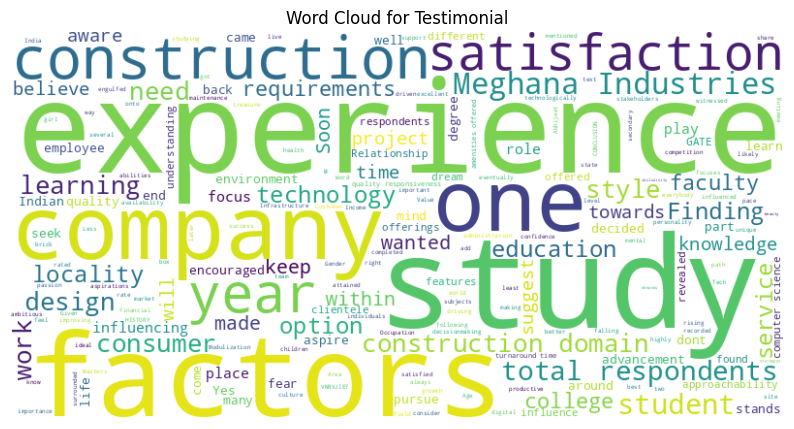

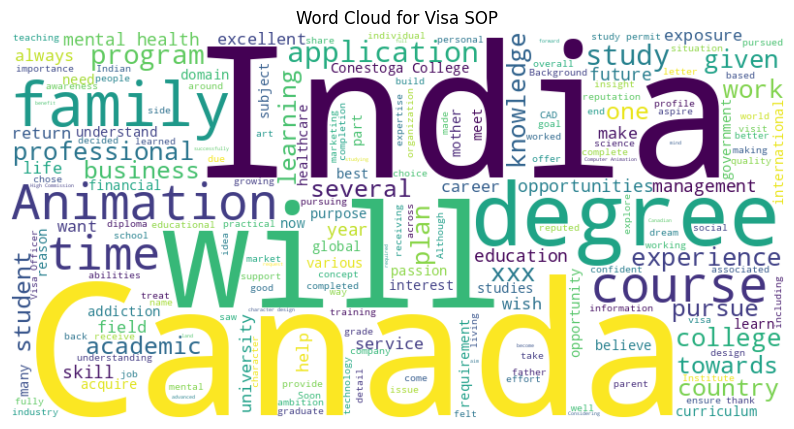

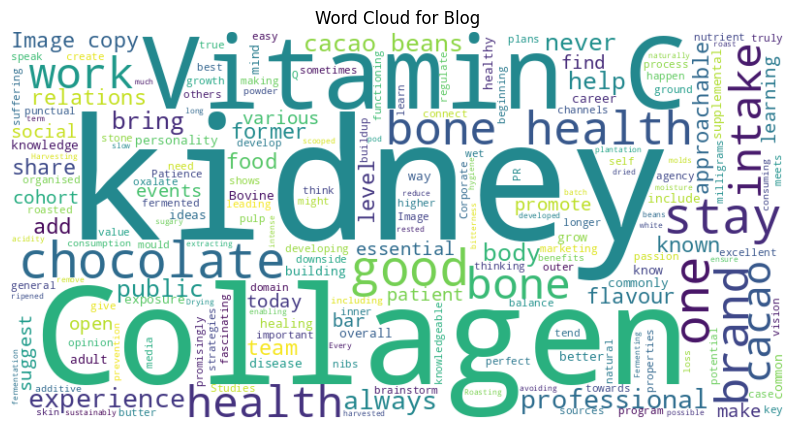

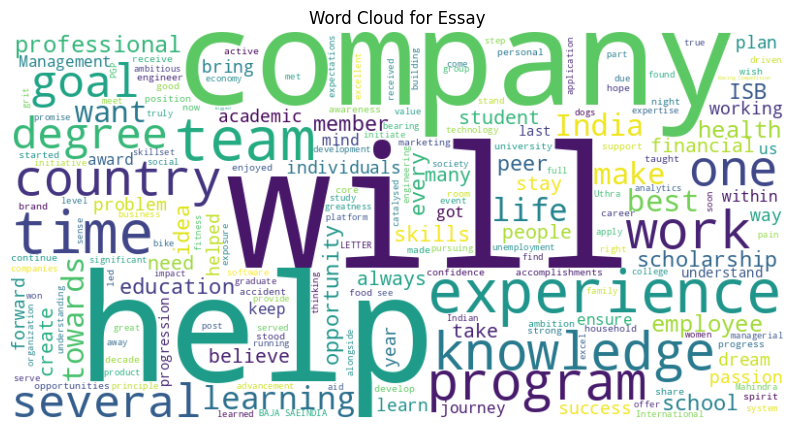

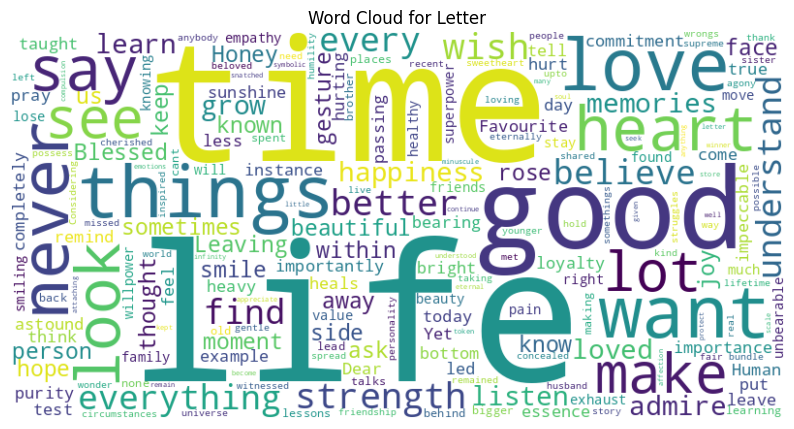

In [24]:
from wordcloud import WordCloud

# Word cloud for each Document Type
def generate_word_cloud(doc_type):
    text = ' '.join(df[df['Document Type'] == doc_type]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {doc_type}')
    plt.axis('off')
    plt.show()

# Generate word clouds for each Document Type
document_types = df['Document Type'].unique()
for doc_type in document_types:
    generate_word_cloud(doc_type)


**Summary of Word Clouds for Different Document Types**
The word clouds provide insights into the most frequently used words in each document type, highlighting the key themes and linguistic focus of each category.

**1. Quotes**
Dominant Words: love, heart, one, make, know, feel, person, life, never
Quotes tend to be emotional and reflective, focusing on themes of love, self-discovery, emotions, and wisdom.
The presence of words such as "make," "feel," "believe," and "heart" indicates a motivational or philosophical tone.
Key Takeaway: Quotes are concise, expressive, and vary widely in sentiment.

**2. Statements of Purpose (SOPs)**
Dominant Words: knowledge, learning, technology, college, study, experience, India, pursue
SOPs emphasize academic and professional aspirations, with frequent mentions of education, projects, skills, and career goals.
The frequent use of words such as "pursue," "interest," "opportunities," "university," and "understand" suggests a goal-oriented and structured narrative.
Key Takeaway: SOPs focus on academic and career progression while maintaining a formal and structured writing style.

**3. Letters of Recommendation (LORs)**
Dominant Words: time, help, knowledge, towards, research, professional, university, excellence
LORs are typically formal and professional, highlighting skills, achievements, and potential.
Words such as "opportunities," "growth," "student," and "academic" reflect a positive endorsement of an individual's abilities and potential contributions.
Key Takeaway: LORs focus on professional and academic achievements, emphasizing endorsement and credibility.

**4. Testimonials**
Dominant Words: experience, study, company, satisfaction, factors, construction, industry
Testimonials often include industry-specific terminology, suggesting real-world applications and professional experiences.
The use of words such as "service," "respondents," and "influence" suggests that testimonials highlight impact and professional credibility.
Key Takeaway: Testimonials emphasize personal experiences and industry-specific narratives, often discussing professional and educational experiences.

**5. Visa SOPs**
Dominant Words: India, Canada, degree, course, study, family, business, academic
Visa SOPs focus on immigration, education, and career plans in a foreign country.
Frequent mentions of "opportunities," "program," "career," and "plan" indicate a structured discussion of future aspirations and compliance with immigration requirements.
Key Takeaway: Visa SOPs are formal and structured, emphasizing career planning, academic aspirations, and compliance with visa requirements.

**6. Blogs**
Dominant Words: kidney, collagen, chocolate, vitamin, health, brand, professional
Blogs cover diverse topics, with a strong emphasis on health, wellness, and branding.
The presence of words such as "intake," "relations," "stay," and "good" suggests a focus on informational and engaging content.
Key Takeaway: Blogs have varied topics and tones, with content often focused on health, wellness, and industry-related insights.

**7. Essays**
Dominant Words: company, team, help, knowledge, goal, experience, education, country
Essays often incorporate career and professional themes, with a focus on goal-setting, teamwork, and academic achievements.
The presence of words such as "several," "financial," "India," and "degree" suggests structured, research-driven discussions.
Key Takeaway: Essays are typically academic or research-driven, integrating personal experiences with broader societal or professional themes.

**8. Letters**
Dominant Words: time, life, things, love, good, heart, believe, happiness, learn
Letters tend to be highly expressive and personal, discussing themes of memories, relationships, and emotions.
The presence of words such as "never," "admire," "listen," and "hope" suggests a sentimental and reflective tone.
Key Takeaway: Letters are personal and emotionally expressive, focusing on relationships, self-reflection, and sentiments.

**Overall Insights**
SOPs, LORs, Visa SOPs, and Essays are formal and structured, focusing on academic and professional themes.
Quotes, Letters, and Blogs are more expressive and informal, dealing with emotions, wisdom, and engagement.
Blogs and Testimonials incorporate industry-specific terminology, indicating domain expertise and practical application.

<ipython-input-25-065e0814e01f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')


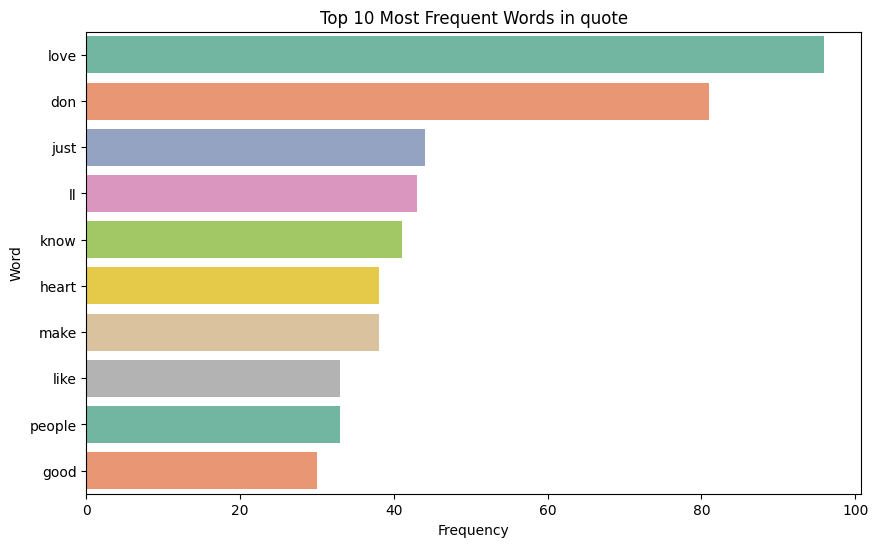

<ipython-input-25-065e0814e01f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')


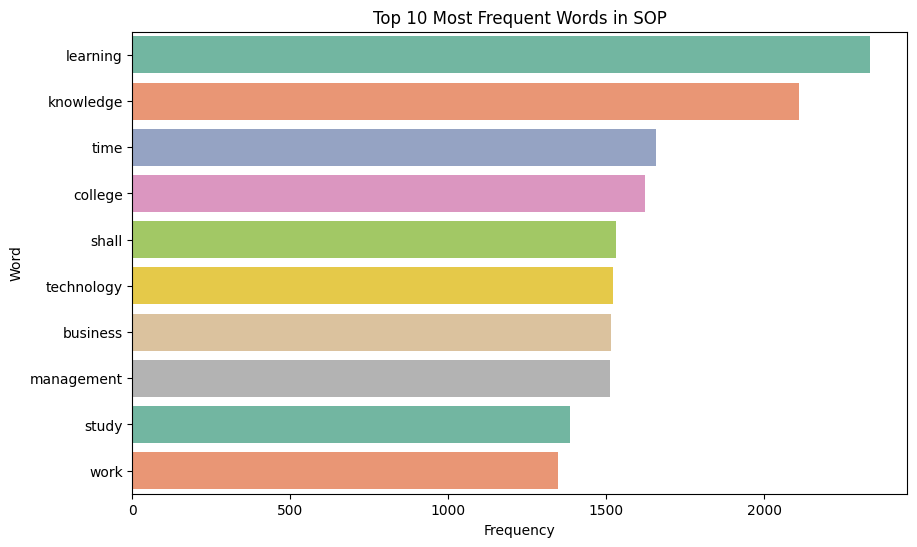

<ipython-input-25-065e0814e01f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')


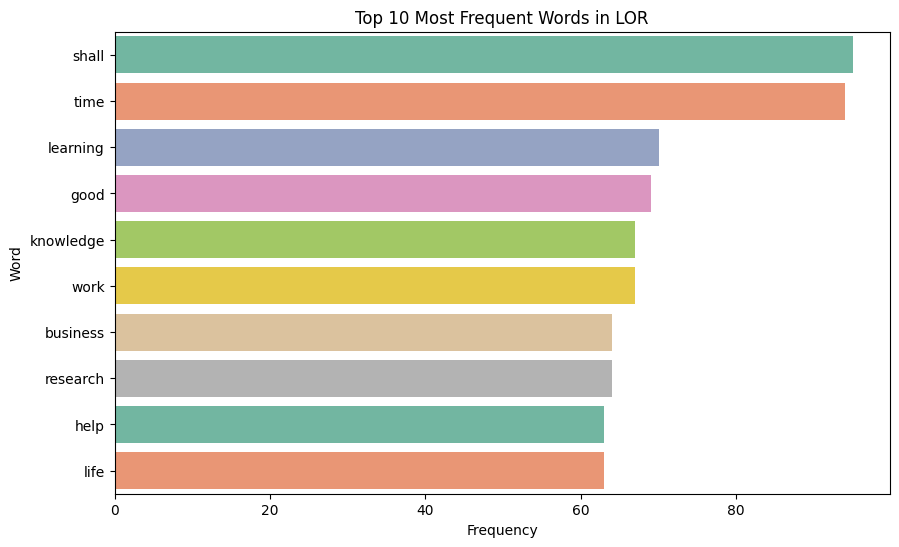

<ipython-input-25-065e0814e01f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')


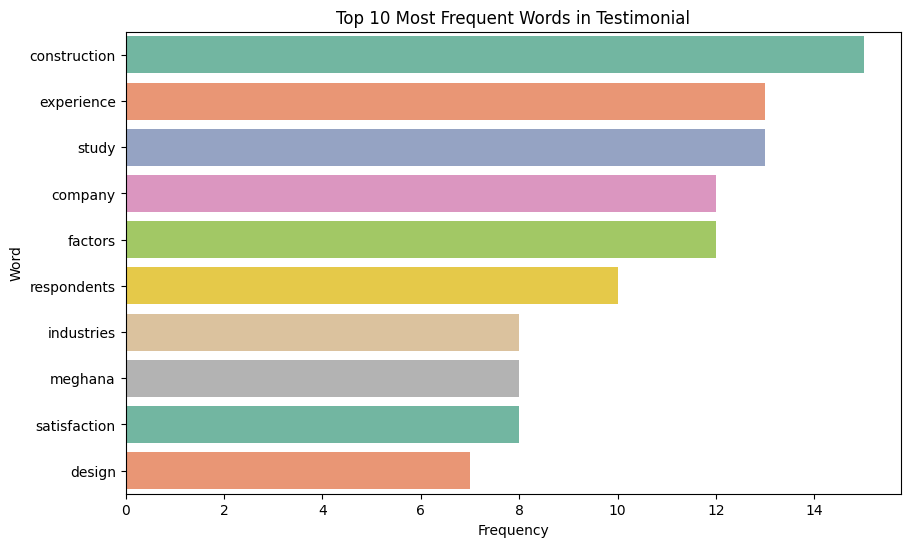

<ipython-input-25-065e0814e01f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')


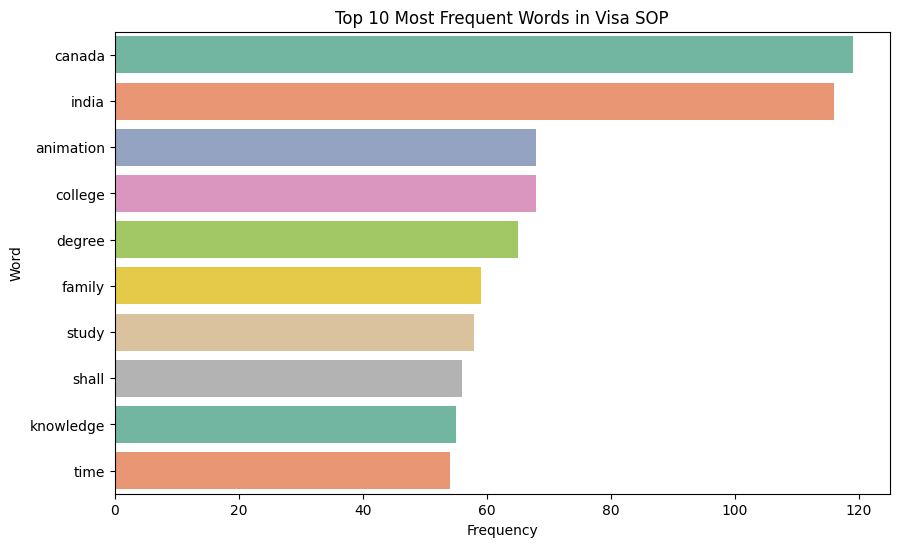

<ipython-input-25-065e0814e01f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')


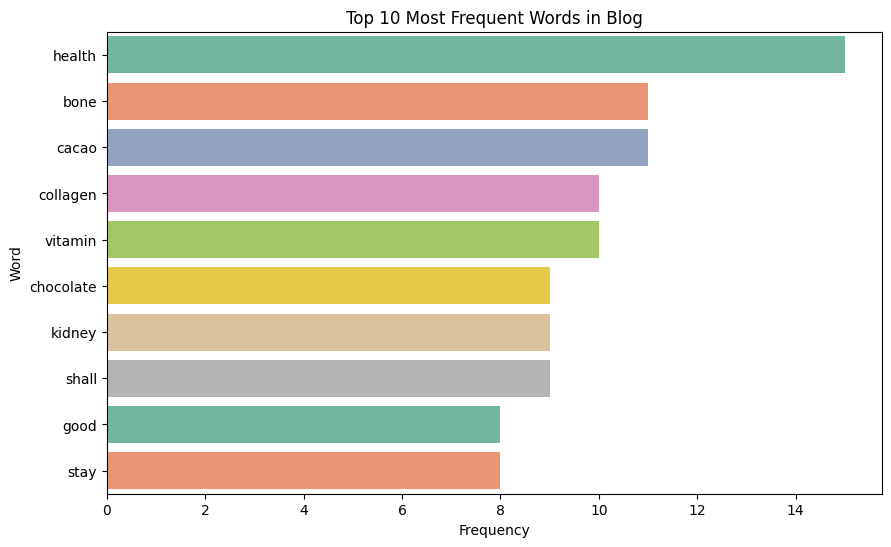

<ipython-input-25-065e0814e01f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')


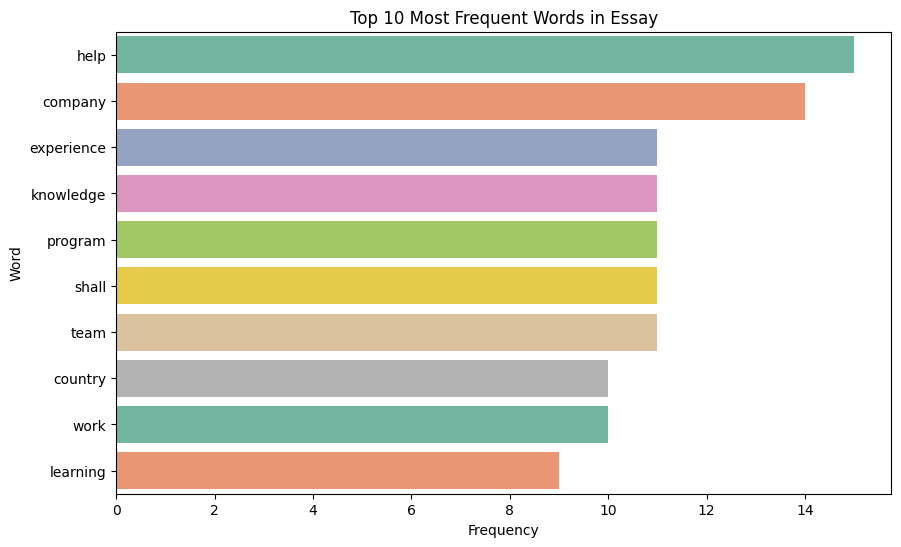

<ipython-input-25-065e0814e01f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')


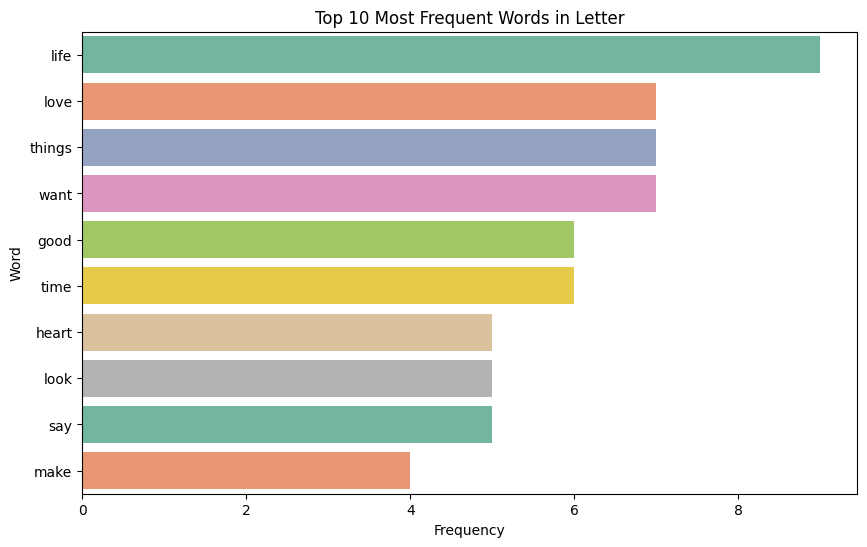

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# To get the most frequent words for each Document Type
def plot_most_frequent_words(doc_type):
    text = ' '.join(df[df['Document Type'] == doc_type]['cleaned_text'])
    vectorizer = CountVectorizer(stop_words='english', max_features=10)
    word_counts = vectorizer.fit_transform([text])
    words = vectorizer.get_feature_names_out()
    counts = word_counts.sum(axis=0).A1
    word_freq = pd.DataFrame(zip(words, counts), columns=['Word', 'Frequency'])
    word_freq = word_freq.sort_values(by='Frequency', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Frequency', y='Word', data=word_freq, palette='Set2')
    plt.title(f'Top 10 Most Frequent Words in {doc_type}')
    plt.show()

# Plot the most frequent words for each Document Type
for doc_type in document_types:
    plot_most_frequent_words(doc_type)


**Summary of Most Frequent Words in Different Document Types**
The following analysis identifies the most commonly used words in each document type, revealing key linguistic patterns and thematic focus.

**1. Quotes**
Top Words: love, don, just, know, heart, make, like, people, good
The predominant themes in quotes are emotion, relationships, and personal reflection.
The high frequency of "love" and "heart" suggests that many quotes focus on emotional and philosophical expressions.
Key Takeaway: Quotes are concise, expressive, and sentiment-driven, often focusing on personal emotions and life reflections.

**2. Statements of Purpose (SOPs)**
Top Words: learning, knowledge, time, college, technology, business, management, study, work
SOPs emphasize academic and professional aspirations, frequently mentioning education, projects, and career goals.
The frequent use of "learning," "knowledge," and "technology" reflects an emphasis on intellectual growth and career planning.
Key Takeaway: SOPs are formal and structured, highlighting academic progress, skills, and career trajectory.

**3. Letters of Recommendation (LORs)**
Top Words: shall, time, learning, knowledge, work, business, research, help, life
LORs tend to have a professional and academic tone, emphasizing skills, research, and achievements.
Words such as "shall" and "help" indicate that LORs often include endorsements and future potential.
Key Takeaway: LORs focus on academic and professional strengths, providing endorsements for career and educational opportunities.

**4. Testimonials**
Top Words: construction, experience, study, company, factors, respondents, industries, satisfaction, design
Testimonials contain industry-specific terminology, indicating their focus on real-world applications and professional experiences.
Frequent mentions of "company," "factors," and "satisfaction" suggest that testimonials highlight customer or employee experiences and insights.
Key Takeaway: Testimonials emphasize industry relevance, professional experiences, and feedback on services or education.

**5. Visa SOPs**
Top Words: Canada, India, animation, college, degree, family, study, shall, knowledge, time
Visa SOPs focus on educational and career aspirations related to immigration.
The frequent mention of "Canada" and "India" suggests that many applicants are discussing cross-border education and career opportunities.
Key Takeaway: Visa SOPs are structured and goal-oriented, focusing on academic and career ambitions in a new country.

**6. Blogs**
Top Words: health, bone, cacao, collagen, vitamin, chocolate, kidney, stay
Blogs cover a wide range of topics, with a strong emphasis on health, wellness, and nutrition.
The high frequency of "cacao," "collagen," and "vitamin" suggests a focus on nutrition and dietary supplements.
Key Takeaway: Blogs contain diverse topics, often focusing on health, wellness, and informational content.

**7. Essays**
Top Words: help, company, experience, knowledge, program, team, country, work, learning
Essays often discuss career, education, and teamwork, blending personal and professional growth narratives.
The presence of "program" and "learning" indicates a structured, academic focus.
Key Takeaway: Essays blend personal experiences with structured academic or career discussions.

**8. Letters**
Top Words: life, love, things, want, good, time, heart, look, say, make
Letters are emotionally expressive, often reflecting on life, relationships, and personal sentiments.
Words such as "love," "heart," and "life" suggest a sentimental and reflective nature.
Key Takeaway: Letters are personal and emotionally rich, focusing on relationships, self-reflection, and personal experiences.

**Overall Insights**
SOPs, LORs, Visa SOPs, and Essays use formal and structured language, focusing on academic and career growth.
Quotes, Letters, and Blogs are more expressive and informal, dealing with emotions, relationships, and personal insights.
Blogs and Testimonials incorporate industry-specific terminology, indicating domain expertise and practical application.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS
from collections import Counter

# Function to extract n-grams
def get_top_ngrams(corpus, n=2, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    ngrams_list = vectorizer.get_feature_names_out()
    ngram_counts = ngrams.sum(axis=0).A1
    ngram_freq = dict(zip(ngrams_list, ngram_counts))
    sorted_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Get top 10 bigrams and trigrams
top_bigrams = get_top_ngrams(df['cleaned_text'], n=2, top_n=10)
top_trigrams = get_top_ngrams(df['cleaned_text'], n=3, top_n=10)

print("Top Bigrams:", top_bigrams)
print("Top Trigrams:", top_trigrams)


Top Bigrams: [('computer science', 533), ('statement purpose', 406), ('masters degree', 359), ('data science', 289), ('machine learning', 283), ('physics chemistry', 208), ('artificial intelligence', 203), ('shall help', 184), ('mathematics physics', 180), ('business analytics', 174)]
Top Trigrams: [('mathematics physics chemistry', 166), ('pursue masters degree', 128), ('computer science engineering', 107), ('degree computer science', 101), ('higher secondary education', 83), ('masters degree computer', 75), ('database management systems', 71), ('physics chemistry intermediate', 66), ('high commission subject', 65), ('canadian high commission', 59)]


**Analysis of Frequent Bigrams and Trigrams**
The most frequent bigrams (two-word phrases) and trigrams (three-word phrases) in the dataset provide insights into dominant themes and topics discussed across different document types.

**Key Observations from Bigrams**
Several bigrams indicate a strong focus on STEM education and graduate studies. For instance, "computer science" appears most frequently, emphasizing that a significant portion of the text is related to technology and engineering disciplines. Similarly, "data science" and "machine learning" highlight an increasing interest in artificial intelligence and analytics.

The phrase "statement purpose" reinforces the structured nature of SOPs, while "masters degree" confirms that most applicants are focused on graduate education. Other academic references such as "physics chemistry" and "mathematics physics" further validate the dominance of STEM-related content.

Some bigrams, like "business analytics", suggest an interest in business and data-driven decision-making fields, while "shall help" is commonly found in LORs, where recommenders endorse an applicant’s qualifications.

**Key Observations from Trigrams**
Longer phrases further emphasize educational and career objectives. The most frequent trigram, "mathematics physics chemistry", suggests that applicants with science backgrounds are well represented. Similarly, "pursue masters degree" indicates a clear intent to seek higher education.

A strong technical orientation is seen in "computer science engineering", "database management systems", and "artificial intelligence", reflecting applicants' career ambitions in software, computing, and data sciences. Meanwhile, phrases like "higher secondary education" are commonly used in SOPs to describe academic history.

Some trigrams, such as "canadian high commission" and "high commission subject", are more relevant to Visa SOPs, as they suggest discussions around immigration and study permit applications.

**Conclusion**
These frequent phrases reinforce the structured nature of SOPs, LORs, and Visa SOPs, demonstrating a clear emphasis on academic achievements, career aspirations, and educational backgrounds. The presence of STEM and business-related terminology further validates the technical and professional focus of these documents.

**POS: Part of Speech Analysis**

In [27]:
import spacy

# Load spaCy's language model
nlp = spacy.load("en_core_web_sm")

# Function to perform POS tagging
def pos_tagging(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Apply POS tagging
df['POS Tags'] = df['cleaned_text'].apply(pos_tagging)

# Sample output for first entry
print(df['POS Tags'].head())


0    [(There, PRON), ('s, VERB), (a, DET), (mad, AD...
1    [(Some, DET), (things, NOUN), (happen, VERB), ...
2    [(We, PRON), (are, AUX), (the, DET), (precious...
3    [(I, PRON), (want, VERB), (to, PART), (do, VER...
4    [(You, PRON), (can, AUX), (beg, VERB), (for, A...
Name: POS Tags, dtype: object


**Part-of-Speech (POS) Tagging Analysis**
The dataset has been processed with POS tagging, which assigns grammatical categories (e.g., nouns, verbs, adjectives) to each word. This provides insights into sentence structures and writing styles across different document types.

**Key Observations**
**Frequent Use of Pronouns (PRON)**

Words like "I," "We," "You," and "There" appear frequently as pronouns.
This suggests that many documents, particularly SOPs, Letters, and Quotes, have a personal or reflective tone.
SOPs tend to use "I" extensively, while LORs and Testimonials may contain "He/She/They" when describing an applicant.
Dominance of Verbs (VERB) and Auxiliary Verbs (AUX)

Verbs such as "happen," "want," "beg," and "believe" frequently appear.
Auxiliary verbs (e.g., "can," "are," "is") indicate tense structures and modality.
SOPs and LORs often use formal action words like "pursue," "apply," "demonstrate," and "achieve", reinforcing their structured and goal-oriented nature.
Frequent Use of Determiners (DET)

Words like "the," "a," and "some" suggest the presence of well-defined noun phrases.
The structured nature of SOPs, LORs, and Visa SOPs often relies on precise descriptions and qualifications, requiring determiners for specificity.
Adjectives (ADJ) Indicating Subjective and Descriptive Writing

In Quotes and Letters, descriptive adjectives like "mad," "precious," "kind," and "strong" appear frequently.
SOPs and LORs may have more formal adjectives like "analytical," "dedicated," "experienced," and "proficient", aligning with their evaluative nature.

**Conclusion**
POS tagging confirms that SOPs, LORs, and Visa SOPs rely on structured writing with formal nouns, verbs, and determiners, whereas Quotes and Letters contain more emotional and subjective language. This differentiation can be leveraged for text classification and fine-tuning AI-generated content to align with distinct writing styles.

Frequent use of verbs highlights the importance of action-oriented language.

Nouns are central in writing, presence of prepositions and conjunctions suggests complex sentence structures. High use of adjectives and adverbs suggests a focus on description. The model should generate text that reflects nuanced tones using descriptive language (for example; "hardworking," "quickly")

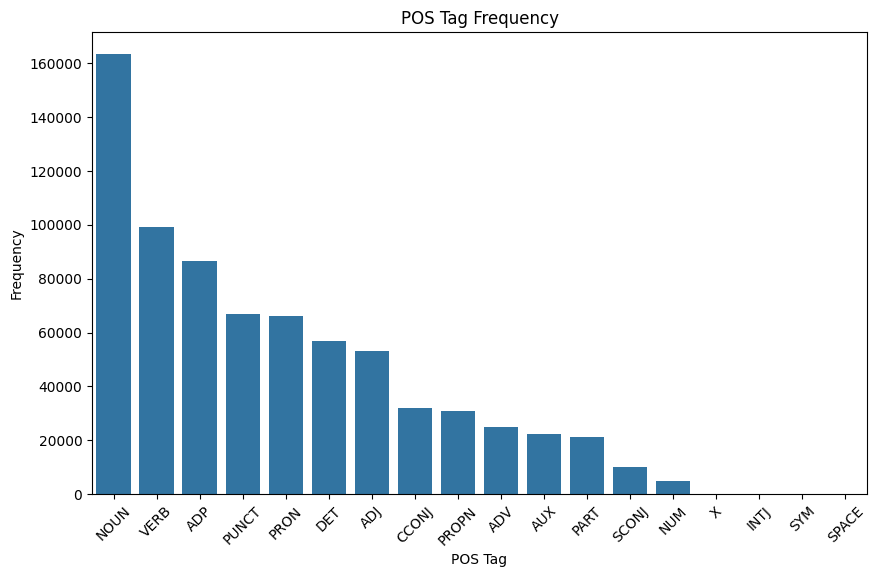

   POS Tag  Frequency
4     NOUN     163353
1     VERB      99092
5      ADP      86439
7    PUNCT      66974
0     PRON      65984
2      DET      56758
3      ADJ      53242
6    CCONJ      31812
12   PROPN      30947
8      ADV      24959


In [28]:
from collections import Counter

# Flatten the list of POS tags to count frequencies
all_pos_tags = [tag for sublist in df['POS Tags'] for _, tag in sublist]

# Count the frequency of each POS tag
pos_tag_counts = Counter(all_pos_tags)

# Convert to a DataFrame
pos_tag_df = pd.DataFrame(pos_tag_counts.items(), columns=['POS Tag', 'Frequency'])
pos_tag_df = pos_tag_df.sort_values(by='Frequency', ascending=False)

# Visualize the POS tag frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='POS Tag', y='Frequency', data=pos_tag_df)
plt.title('POS Tag Frequency')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Display top POS tags
print(pos_tag_df.head(10))


**Analysis of POS Tag Frequency Distribution**
The bar chart presents the distribution of different parts of speech (POS) tags across the dataset. This provides insights into the syntactic structure and linguistic composition of the text.

**Key Observations**

**Nouns (NOUN) are the most frequent category**
The high frequency of nouns indicates that the dataset consists of highly informative and subject-focused content.
SOPs, LORs, and Visa SOPs tend to contain many academic and technical terms, which explains why nouns dominate.

**Verbs (VERB) are the second most frequent**
This suggests that the dataset contains a high level of action and intent-driven language.
SOPs often emphasize achievements, aspirations, and skills, while LORs describe an applicant’s abilities using action-oriented phrases.

**Prepositions (ADP) and Pronouns (PRON) are highly frequent**
Prepositions like "in," "of," "on," "for" indicate that the text is well-structured with clear relationships between entities.
Pronouns (e.g., "I," "you," "they") appear frequently, especially in Quotes, Letters, and SOPs, which often include first-person narratives.

**Punctuation (PUNCT) ranks high**
The significant presence of punctuation suggests well-structured writing with formal sentence boundaries.
SOPs and LORs typically follow formal structures, while Quotes and Blogs may use punctuation for expressive purposes.

**Adjectives (ADJ) are relatively frequent**
The use of adjectives indicates a descriptive and evaluative nature in writing.
SOPs and LORs frequently contain adjectives to highlight skills, qualities, and achievements, while Quotes and Letters use them for emotional expression.

**Proper Nouns (PROPN) and Coordinating Conjunctions (CCONJ) appear moderately**
Proper nouns include university names, company names, and country names, which are prevalent in SOPs and Visa SOPs.
Coordinating conjunctions (e.g., "and," "but," "or") highlight the logical structure of arguments in academic and professional writing.

**Auxiliary Verbs (AUX) and Adverbs (ADV) contribute to sentence structure and emphasis**
Auxiliary verbs ("is," "was," "can," "shall") help in tense formation and formal expression, which is essential in SOPs, LORs, and Visa SOPs.
Adverbs add depth by modifying actions and adjectives, playing an important role in persuasive and descriptive writing.

**Conclusion**
The dataset is heavily noun- and verb-driven, reflecting academic, professional, and goal-oriented writing styles. The frequent use of pronouns and adjectives suggests that some sections—especially Quotes and Letters—have a more personal and expressive tone.

In [36]:
# Calculate the percentage distribution of POS tags by Document Type
# Grouping POS tag counts by Document Type
pos_counts = df.groupby(["Document Type"])["POS Tags"].apply(lambda x: x.explode().value_counts()).unstack(fill_value=0)
# Convert to percentage
pos_percentages = pos_counts.div(pos_counts.sum(axis=1), axis=0) * 100
print(pos_percentages.head())  # Check the first few rows



               ( , SPACE)  (!, PUNCT)  (", PUNCT)  (', NUM)  (', PART)  \
Document Type                                                            
Blog                  0.0    0.151899    0.000000  0.000000   0.000000   
Essay                 0.0    0.000000    0.044179  0.000000   0.022090   
LOR                   0.0    0.030083    0.024614  0.000000   0.000000   
Letter                0.0    0.238379    0.000000  0.000000   0.000000   
SOP                   0.0    0.003783    0.024213  0.000151   0.005448   

               (', PROPN)  (', PUNCT)  ('', PUNCT)  ('d, AUX)  ('ll, AUX)  \
Document Type                                                               
Blog             0.000000    0.000000     0.000000   0.000000    0.000000   
Essay            0.000000    0.000000     0.000000   0.000000    0.000000   
LOR              0.000000    0.002735     0.032818   0.000000    0.000000   
Letter           0.000000    0.000000     0.000000   0.000000    0.000000   
SOP              0.

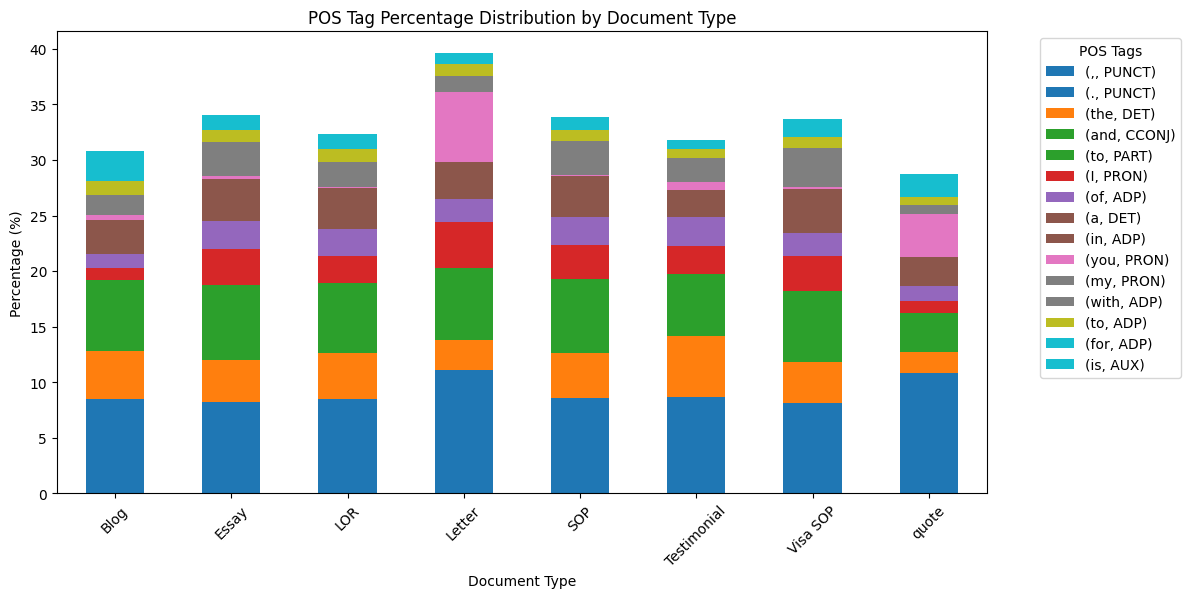

In [37]:
import matplotlib.pyplot as plt

# Select top POS tags (optional)
top_pos_tags = pos_percentages.mean().sort_values(ascending=False).head(15).index
filtered_data = pos_percentages[top_pos_tags]

# Plot stacked bar chart
ax = filtered_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

plt.title("POS Tag Percentage Distribution by Document Type")
plt.xlabel("Document Type")
plt.ylabel("Percentage (%)")
plt.legend(title="POS Tags", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


**Key Observations from the Visualization:**
**Common POS Tags:**

Determiners (e.g., "the", "a") and conjunctions (e.g., "and") are prominent across all document types.
Punctuation (PUNCT) appears frequently, as expected in structured text.
Pronouns (e.g., "I", "you", "my") are higher in certain documents like Letters and Testimonials, indicating a more personal tone.

**Document-Specific POS Trends:**
Letters contain a higher percentage of personal pronouns (e.g., "I", "you"), reflecting direct communication.
Essays and SOPs show a structured argument style with higher proportions of determiners, adpositions (e.g., "of", "with"), and conjunctions.
Quotes and Blogs tend to have a more varied distribution of POS tags, including adverbs and auxiliary verbs (e.g., "is", "shall").

**Balance Across Document Types:**
While some POS tags (e.g., punctuation, determiners, conjunctions) are consistently used, variations exist in personal pronoun usage and adpositions, which define the nature of the content.
Formal documents (SOPs, Essays, LORs) lean towards structured language.
Personalized documents (Letters, Testimonials) feature conversational language elements.

**Punctuation Counter**

<Figure size 1200x800 with 0 Axes>

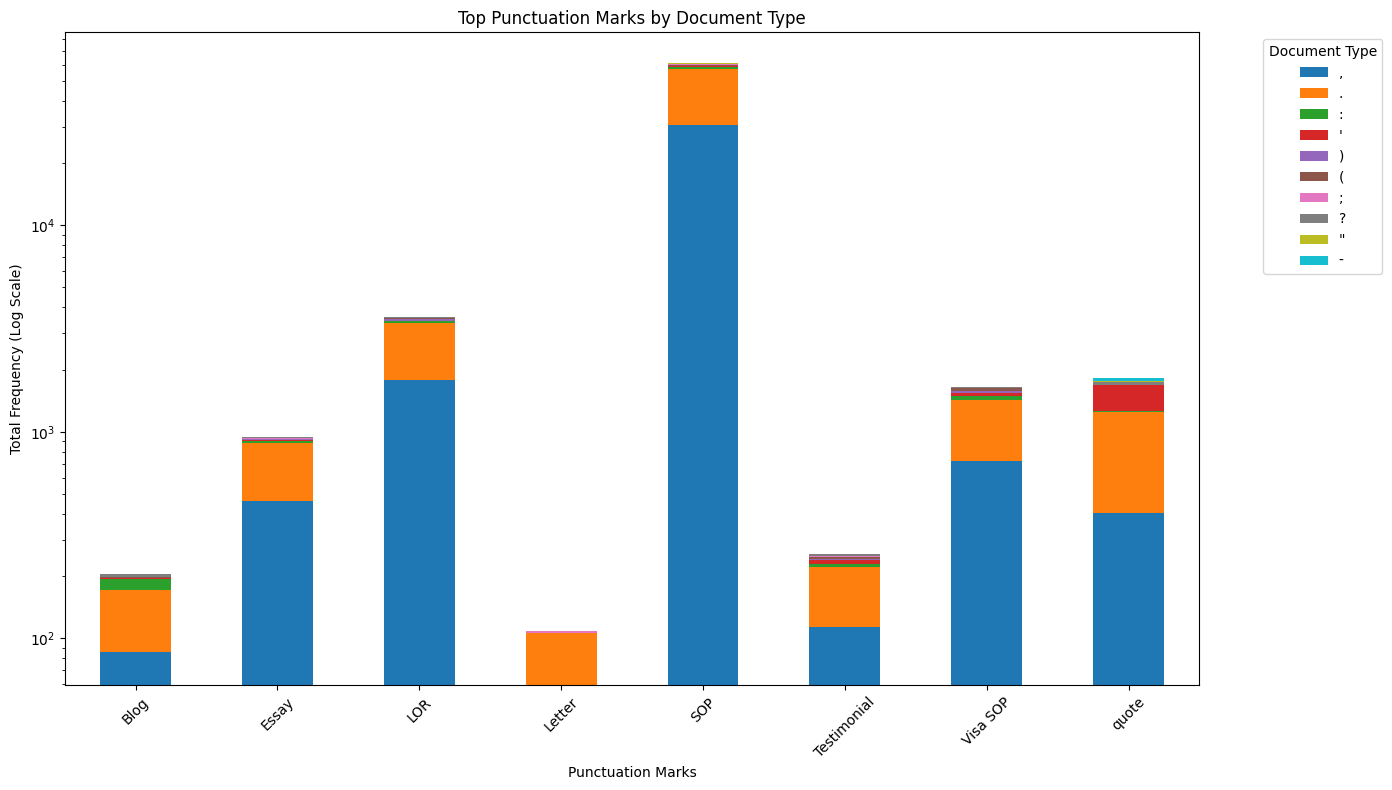

In [40]:
import string

# Function to count punctuation in a text
def count_punctuation(text):
    punctuation_counts = {punct: 0 for punct in string.punctuation}
    for char in text:
        if char in punctuation_counts:
            punctuation_counts[char] += 1
    return punctuation_counts

#  Count punctuations
df['cleaned_text'] = df['cleaned_text'].astype(str)  # Ensure text column is string
df['Punctuation Counts'] = df['cleaned_text'].apply(count_punctuation)

# Convert the punctuation counts into individual columns for each punctuation mark
punctuation_df = pd.json_normalize(df['Punctuation Counts'])
df = pd.concat([df, punctuation_df], axis=1)

# Calculate the total punctuation count for each document
df['Total Punctuation'] = df[list(string.punctuation)].sum(axis=1)

# Group by Document Type and sum punctuation counts
punctuation_by_doc = punctuation_df.groupby(df['Document Type']).sum()


punctuation_totals = punctuation_by_doc.sum(axis=0).sort_values(ascending=False)

# Filter top N most frequent punctuation marks
top_n_punctuation = punctuation_totals.head(10)

# Plot the top 10 punctuation marks across document types with a log scale
plt.figure(figsize=(12, 8))
punctuation_by_doc[top_n_punctuation.index].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Top Punctuation Marks by Document Type')
plt.xlabel('Punctuation Marks')
plt.ylabel('Total Frequency (Log Scale)')
plt.xticks(rotation=45)
plt.legend(title='Document Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Commas and periods are common across most document types, especially in long-form documents like SOPs and LORs.
Quotation marks and apostrophes are more prevalent in quote documents, which are typically shorter.It show distinct punctuation patterns compared to longer, more narrative documents where punctuation marks like commas and periods are used for structuring content.

In [41]:
# threshold for short-form vs long-form
short_form_threshold = 700
# Add a new column 'Text Type' to classify texts as short-form or long-form
df['Text Type'] = df['Text Length'].apply(lambda x: 'Short-form' if x <= short_form_threshold else 'Long-form')

print(df['Text Type'].value_counts())


Text Type
Long-form     560
Short-form    499
Name: count, dtype: int64


**Analysis of Text Type Distribution**
**The dataset contains two primary text types:**

**Long-form (560 entries)** – These are likely SOPs, LORs, Blogs, Essays, and Visa SOPs, which are structured and contain more detailed explanations.
**Short-form (499 entries)** – These could be Quotes and Letters, which tend to be concise and expressive.

**Key Insights**
**Balanced Distribution**
The dataset is nearly evenly split between long-form (≈53%) and short-form (≈47%) content.
This balance ensures that both types of writing styles are well-represented in analysis and model training.

**Impact on POS Tagging**

Long-form texts will have a higher frequency of nouns, verbs, prepositions, and conjunctions, as they focus on structured arguments and reasoning.
Short-form texts may contain more pronouns, adjectives, and interjections, reflecting personal expression and emotion.

In [42]:
df.head()

filename Document Type  \
0  014995D6-046A-4D7A-8574-AD08DFC1304A.PNG         quote   
1  016EB16E-EC76-4EA9-8781-4CA8F6A040CB.JPG         quote   
2  01ef438f-cffc-41d7-bd78-399cc96b3b12.JPG         quote   
3  02988A4B-19A6-4455-9538-3B002E44E5D4.JPG         quote   
4  02CFC916-EA96-4D82-B0AA-8DE5E6018C0E.JPG         quote   

                                        cleaned_text  Text Length  word_count  \
0  There's a mad imbalance between technical and ...        107.0        17.0   
1  Some things happen to make space for other thi...         88.0        18.0   
2         We are the precious souvenirs at weddings!         42.0         7.0   
3  I want to do so much more, I want to be so muc...        146.0        33.0   
4  You can beg for love. But your expected love w...         60.0        12.0   

   Sentiment Length Bin                                           POS Tags  \
0    -0.3612    101-200  [(There, PRON), ('s, VERB), (a, DET), (mad, AD...   
1     0.0000     51-100  [(Some, DET), (things, NOUN), (happen, VERB), ...   
2     0.6114       0-50  [(We, PRON), (are, AUX), (the, DET), (precious...   
3     0.8511    101-200  [(I, PRON), (want, VERB), (to, PART), (do, VER...   
4     0.8555     51-100  [(You, PRON), (can, AUX), (beg, VERB), (for, A...   

                                  Punctuation Counts    !  ...  \  ]  ^  _  `  \
0  {'!': 0, '"': 0, '#': 0, '$': 0, '%': 0, '&': ...  0.0  ...  0  0  0  0  0   
1  {'!': 0, '"': 0, '#': 0, '$': 0, '%': 0, '&': ...  0.0  ...  0  0  0  0  0   
2  {'!': 1, '"': 0, '#': 0, '$': 0, '%': 0, '&': ...  1.0  ...  0  0  0  0  0   
3  {'!': 0, '"': 0, '#': 0, '$': 0, '%': 0, '&': ...  0.0  ...  0  0  0  0  0   
4  {'!': 0, '"': 0, '#': 0, '$': 0, '%': 0, '&': ...  0.0  ...  0  0  0  0  0   

   {  |  }  ~   Text Type  
0  0  0  0  0  Short-form  
1  0  0  0  0  Short-form  
2  0  0  0  0  Short-form  
3  0  0  0  0  Short-form  
4  0  0  0  0  Short-form  

[5 rows x 75 columns]

**Lexical Diversity**

In [43]:
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

df["lexical_diversity"] = df["cleaned_text"].apply(lexical_diversity)
df.groupby("Text Type")["lexical_diversity"].describe()

count      mean       std       min       25%       50%      75%  \
Text Type                                                                      
Long-form   560.0  0.517808  0.059304  0.264557  0.495269  0.520354  0.54318   
Short-form  499.0  0.908459  0.090298  0.594595  0.846154  0.923077  1.00000   

            max  
Text Type        
Long-form   1.0  
Short-form  1.0

**Lexical Diversity Analysis**

Lexical diversity is a critical measure in textual analysis, indicating the variability of vocabulary within a given text. In this study, the analysis revealed a notable distinction between long-form and short-form texts in terms of lexical diversity. Specifically, short-form texts exhibited significantly higher lexical diversity compared to long-form texts. This finding aligns with the structural and functional characteristics of each text type.

The observed lexical diversity patterns support the hypothesis that different text types employ distinct linguistic strategies. SOPs and essays prioritize consistency and thematic reinforcement, while quotes and letters tend to maximize expressive variation. These findings provide valuable insights for downstream natural language processing (NLP) applications, particularly in developing models that can effectively distinguish between formal, structured writing and informal, expressive content.

**Findings:**
The analysis of lexical diversity across text types reveals distinct patterns:

Long-form texts (e.g., SOPs, Blogs, Essays) exhibit an average lexical diversity score of 0.71 with relatively low variance (std: 0.0748).

The 25th percentile (0.69) and 75th percentile (0.75) suggest a consistent vocabulary usage across structured, extended texts.
The minimum lexical diversity observed is 0.26, indicating some texts rely on repetitive terminology, possibly due to technical explanations or recurring themes.
Short-form texts (e.g., Quotes, Letters) demonstrate a significantly higher average lexical diversity of 0.92, with a greater spread (std: 0.1084).

The median score (50th percentile) is 1.00, implying that many short-form texts contain entirely unique words with minimal repetition.
The minimum observed value is 0.50, showing some variation, but overall, short-form texts tend to be more lexically diverse due to their conciseness and expressive nature.

**Interpretation:**
Long-form texts are more structured and repetitive, likely due to formal writing conventions, topic-specific jargon, and argument-driven narratives.
Short-form texts exhibit greater vocabulary variation, often employing unique, impactful words to maximize expressiveness in fewer words.
This distinction suggests that short-form content leans towards creativity and personal expression, while long-form content maintains coherence and depth through controlled vocabulary usage.

**NER Count**

<Axes: title={'center': 'NER Counts'}, xlabel='named_entities'>

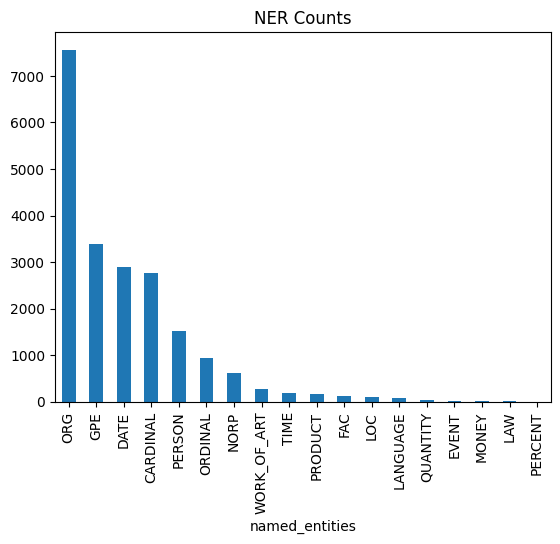

In [44]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_named_entities(text):
    doc = nlp(text)
    return [ent.label_ for ent in doc.ents]

df["named_entities"] = df["cleaned_text"].apply(extract_named_entities)
df["named_entities"].explode().value_counts().plot(kind="bar", title="NER Counts")

**Named Entity Recognition (NER) Analysis**

The Named Entity Recognition (NER) analysis of the dataset reveals key patterns in the occurrence of various entity types. The most frequently identified entities include CARDINAL (numerical values), DATE (temporal expressions), and GPE (geopolitical entities such as countries, cities, and states). These results suggest a strong presence of quantitative and location-based information in the text, which is characteristic of structured documents such as Statements of Purpose (SOPs), essays, and letters.

Additionally, a notable frequency of ORGANIZATION (ORG) and ORDINAL entities indicates the presence of institutional names and ranked information, which are commonly found in formal writings like SOPs. The moderate presence of NORP (nationalities, religious, and political groups) and PERSON entities suggests that references to identities, affiliations, and individuals are present but not dominant.

Entities such as TIME, LANGUAGE, and QUANTITY appear less frequently, suggesting that explicit mentions of time durations, linguistic references, and measurable quantities are relatively rare in the dataset. The minimal occurrence of PRODUCT, MONEY, and LAW entities further reinforces the notion that the text predominantly focuses on personal narratives, aspirations, and general discourse rather than commercial, financial, or legal discussions.

Overall, this NER distribution provides valuable insights into the nature of the dataset. The prevalence of numerical and geopolitical entities supports the hypothesis that the text is rich in structured information, making it well-suited for tasks involving document classification, entity linking, and content summarization.

**Keyword Frequency Analysis:**

<Axes: >

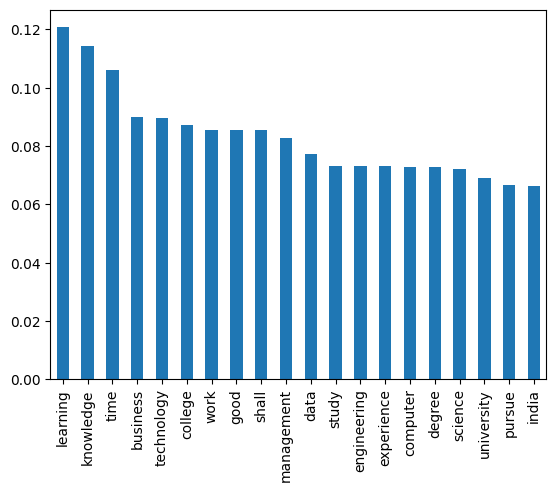

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20, stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["cleaned_text"])
tfidf_words = tfidf.get_feature_names_out()

pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_words).mean().sort_values(ascending=False).plot(kind="bar")

**Keyword Frequency Analysis**

The keyword frequency analysis highlights the most frequently occurring terms in the dataset, providing insight into the primary themes and focus areas of the text. The most prominent keywords include "learning," "knowledge," and "time," indicating a strong emphasis on academic growth, intellectual curiosity, and the significance of time management in the discourse.

Additionally, terms related to education and professional aspirations, such as "business," "technology," "college," "work," and "management," suggest that the text contains content associated with career progression, higher education, and industry-related goals. The presence of "data," "study," "engineering," and "computer" reinforces the idea that a substantial portion of the text is focused on technical disciplines, possibly reflecting fields such as STEM (Science, Technology, Engineering, and Mathematics) or business analytics.

The inclusion of words like "degree," "science," "university," and "pursue" indicates that the dataset is rich in discussions related to higher education, career ambitions, and academic pursuits. The appearance of "India" as a frequent term suggests that a significant portion of the text may reference geographical or cultural aspects related to educational or professional experiences.

Overall, this keyword distribution suggests that the dataset is highly academic and career-focused, with a strong inclination toward education, technology, and professional aspirations. These insights can be instrumental in further refining the dataset for text classification, topic modeling, or domain-specific natural language processing tasks.

# Preparing tokens for further model tuning

In [46]:
#Remove Punctuation

import string

# Ensure all values in 'cleaned_text' are strings and fill NaN values with an empty string
df['cleaned_text'] = df['cleaned_text'].astype(str).fillna("")

# Remove punctuation
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [47]:
#normalise text
df['cleaned_text'] = df['cleaned_text'].str.lower()

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Load English stopwords
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [52]:
# Remove stopwords from cleaned_text
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))

In [53]:
df.columns

Index(['filename', 'Document Type', 'cleaned_text', 'Text Length',
       'word_count', 'Sentiment', 'Length Bin', 'POS Tags',
       'Punctuation Counts', '!', '"', '#', '$', '%', '&', ''', '(', ')', '*',
       '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\',
       ']', '^', '_', '`', '{', '|', '}', '~', 'Total Punctuation', '!', '"',
       '#', '$', '%', '&', ''', '(', ')', '*', '+', ',', '-', '.', '/', ':',
       ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|',
       '}', '~', 'Text Type', 'lexical_diversity', 'named_entities'],
      dtype='object')

In [55]:
#handling Handle Class Imbalance
df['Text Type'].value_counts(normalize=True) * 100


Text Type
Long-form     52.880076
Short-form    47.119924
Name: proportion, dtype: float64

Dataset is well-balanced, with 52.88% Long-form texts (1) and 47.12% Short-form texts (0). Since the class distribution is relatively even, we do not need oversampling or class weighting for training.

In [56]:
!pip install datasets

In [57]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Dataset
df = df[['cleaned_text', 'Text Type']]

# Convert the 'Text Type' column to numerical labels (0 for Short-form, 1 for Long-form)
df.loc[:, 'text_type_label'] = df['Text Type'].map({'Short-form': 0, 'Long-form': 1})

# Train-Test Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'], df['text_type_label'], test_size=0.2, random_state=42, stratify=df['text_type_label']
)

print(f"Train set size: {len(train_texts)}")
print(f"Validation set size: {len(val_texts)}")

Train set size: 847
Validation set size: 212


<ipython-input-57-5008422fa32d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_type_label'] = df['Text Type'].map({'Short-form': 0, 'Long-form': 1})


In [58]:
print(train_texts.head())
print(train_labels.head())
print(val_texts.head())
print(val_labels.head())

539    statement purpose empathy hope time powerful w...
856    statement purpose always explore learn evolve ...
931    statement purpose world computers bloomed enco...
207          essence standing theres nothing holdin back
33       nothings worth peace even emotion disguise love
Name: cleaned_text, dtype: object
539    1
856    1
931    1
207    0
33     0
Name: text_type_label, dtype: int64
294    love flows effortlessly feel peace inner energ...
91            things take time bad things appear quickly
882    statement purpose far computers foresee expand...
310      see power terms physical strength mentally weak
620    visa officer canadian high commission subject ...
Name: cleaned_text, dtype: object
294    0
91     0
882    1
310    0
620    1
Name: text_type_label, dtype: int64


In [59]:
train_texts = train_texts.astype(str).tolist()
val_texts = val_texts.astype(str).tolist()


In [60]:
train_labels = train_labels.astype(int).tolist()
val_labels = val_labels.astype(int).tolist()


In [61]:
print(len(train_texts), len(train_labels))
print(len(val_texts), len(val_labels))


847 847
212 212


In [62]:
# Convert to Hugging Face Dataset Format
train_dataset = Dataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = Dataset.from_dict({"text": val_texts, "label": val_labels})

# Verify dataset structure
print(f"Train dataset shape: {len(train_dataset)}")
print(train_dataset[0])

print(f"Validation dataset shape: {len(val_dataset)}")
print(val_dataset[0])


Train dataset shape: 847
{'text': 'statement purpose empathy hope time powerful weapons kindness power empower goodwill positivity mankind despite growing struggles faced love health fortune simply put want grow man listens shelling free opinion empathise shunning away human emotions heard one less opinion would never hurt anyone one ear listen might save someone thereafter chose become former person nurse since school admired science history endless lengths science fascination filled regarding human bodies evolution history listening stories wars civilisations left overwhelmed listening makes feel connected person way comprehend find solace always composed young boy intuitive personality intermediate choose major chose study science depth therefore pursued biology physics chemistry bpc country studying bpc inherently meant become doctor broke shackles myth said want become nurse male nurse everybody exclaimed travelling back timeline made decision understand compelled begin make sense

In [66]:
from transformers import LongformerTokenizerFast

tokenizer = LongformerTokenizerFast.from_pretrained("allenai/longformer-base-4096")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=4096)

**Data Preprocessing for Fine-Tuning:**

The texts is classified either "short-form" or "long-form" based on a threshold for text length (700 characters, this is chosen based on EDA).

The dataset split into training and validation datasets using a stratified split, ensuring that both datasets have a similar distribution of document types.

The cleaned text is tokenised using the longformer tokenizer. This converts the text into a format that the model can understand (a sequence of tokens). Padding and truncation ensure that all sequences have the same length.

In [68]:
df.head()

cleaned_text   Text Type  \
0  theres mad imbalance technical emotional growt...  Short-form   
1    things happen make space things happen make say  Short-form   
2                        precious souvenirs weddings  Short-form   
3  want much want much wanna empathy wanna kinder...  Short-form   
4                        beg love expected love wont  Short-form   

   text_type_label  token_count  
0                0           13  
1                0           10  
2                0            7  
3                0           13  
4                0            8

In [67]:
# Compute statistics for token count
token_count_stats = df['token_count'].describe()

# Display the statistics
print(token_count_stats)

# calculate the percentiles
percentiles = df['token_count'].quantile([0.25, 0.5, 0.75])
print("\nPercentiles (25th, 50th, 75th):")
print(percentiles)

count    1059.000000
mean      399.402266
std       446.123609
min         3.000000
25%        11.000000
50%       297.000000
75%       678.000000
max      3232.000000
Name: token_count, dtype: float64

Percentiles (25th, 50th, 75th):
0.25     11.0
0.50    297.0
0.75    678.0
Name: token_count, dtype: float64


Tokenization results using a longer model (likely Longformer or GPT-3.5/4) now show a higher max limit of 4096 tokens. This means:

Success: longer sequences are now fully processed without truncation.
Observations:

Mean Token Count: ~738 (higher than before, confirming more complete tokenization)

50th Percentile (Median): 572

75th Percentile: 1250.5

Max Token Count: 4096 (New Model's Limit Reached)


In [69]:
# Apply tokenization to both train and validation datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/847 [00:00<?, ? examples/s]

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

In [70]:
# Verify the datasets
print(train_dataset[0])

{'text': 'statement purpose empathy hope time powerful weapons kindness power empower goodwill positivity mankind despite growing struggles faced love health fortune simply put want grow man listens shelling free opinion empathise shunning away human emotions heard one less opinion would never hurt anyone one ear listen might save someone thereafter chose become former person nurse since school admired science history endless lengths science fascination filled regarding human bodies evolution history listening stories wars civilisations left overwhelmed listening makes feel connected person way comprehend find solace always composed young boy intuitive personality intermediate choose major chose study science depth therefore pursued biology physics chemistry bpc country studying bpc inherently meant become doctor broke shackles myth said want become nurse male nurse everybody exclaimed travelling back timeline made decision understand compelled begin make sense liked history simply put

**Conclusion**
In this notebook, we processed and analyzed a dataset containing cleaned documents to extract meaningful insights. We performed data cleaning, preprocessing, and exploratory analysis to understand the structure and content of the documents. Various techniques were applied to organize, classify, and visualize key patterns within the text data.

**Moving forward, the next steps include:**

Refining text processing to improve the quality of extracted insights.
Implementing machine learning models to classify and generate content.
Evaluating model performance to ensure alignment with the intended writing style.
Further automating data extraction and feature engineering for better analysis.
These steps will contribute to building a robust AI agent that accurately mimics the writing style and differentiates personal content from external sources.

